# imports and constants

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [19]:
G = 4 * np.pi**2 #gravitational constant
t = 2 #total time
dt = 0.001 #time step
m_sun = 1 #mass of the sun in solar masses (or in kg if you want to be wrong)
m_earth = 3.00274e6
m_mars = 3.213e-6
m_moon = 3.69432e-8
N = int(t/dt)

# initial conditions

In [22]:
sun_pos = np.array([0.0,0.0])
earth_pos = np.array([1.0, 0.0])
mars_pos = np.array([1.524, 0.0])
neptune_pos = np.array([30.07,0.0])

# acceleration function

In [25]:
def accel(r):
    r_mag = np.linalg.norm(r)
    return -(G * r )/ r_mag**3

# EARF

In [29]:
a0 = accel(earth_pos)
r_mag = np.linalg.norm(earth_pos)
v_mag = np.sqrt(np.linalg.norm(a0) * r_mag)
print(v_mag)

6.283185307179586


In [31]:
pos = []
a_old = accel(earth_pos)
r = np.array([-earth_pos[-1],earth_pos[0]]) / r_mag

earth_v = v_mag * r

for i in range(N):
    earth_v += a_old * (dt/2)
    earth_pos += earth_v * dt
    a_new = accel(earth_pos.copy())
    earth_v += a_new * (dt/2)
    a_old = a_new
    pos.append(earth_pos.copy())
    #print("x=",earth_pos)
    #print("v=",earth_v)
    #print("a=",a_old)
    
#np.dot(earth_v, earth_pos)

# MARZ

In [35]:
a0m = accel(mars_pos)
r_magm = np.linalg.norm(mars_pos)
v_magm = np.sqrt(np.linalg.norm(a0m) * r_magm)
print(v_magm)

5.089643749190395


In [37]:
pos1 = []
a_old1 = accel(mars_pos)
rm = np.array([-mars_pos[-1],mars_pos[0]]) / r_magm

mars_v = v_magm * rm

for i in range(N):
    mars_v += a_old1 * (dt/2)
    mars_pos += mars_v * dt
    a_new1 = accel(mars_pos.copy())
    mars_v += a_new1 * (dt/2)
    a_old1 = a_new1
    pos1.append(mars_pos.copy())

# NEPTUNE?! (not yet)

In [51]:
a0n = accel(neptune_pos)
r_magn = np.linalg.norm(neptune_pos)
v_magn = np.sqrt(np.linalg.norm(a0n) * r_magn)
print(v_magn)

1.1458114407741669


In [42]:
'''
pos2 = []
a_old2 = accel(neptune_pos)
rn = np.array([-neptune_pos[-1],neptune_pos[0]]) / r_magn

neptune_v = v_magn * rn

for i in range(N):
    neptune_v += a_old2 * (dt/2)
    neptune_pos += neptune_v * dt
    a_new2 = accel(neptune_pos.copy())
    neptune_v += a_new2 * (dt/2)
    a_old2 = a_new2
    #pos2.append(neptune_pos.copy())
'''

# plot

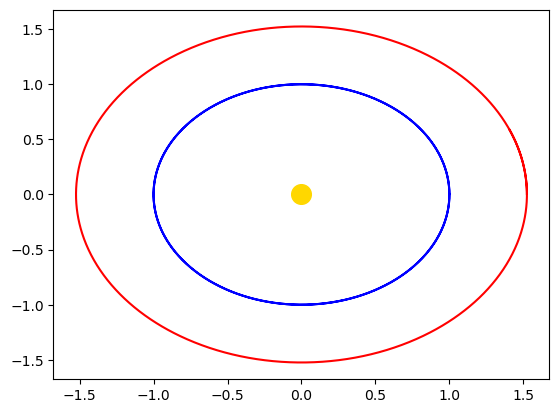

In [45]:
x,y = zip(*pos)
x1,y1 = zip(*pos1)
#x2,y2 = zip(*pos2)
fig, ax = plt.subplots()
ax.scatter(0,0,s=200,color='gold')
ax.plot(x,y,color='blue')
ax.plot(x1,y1,color='red')
#ax.plot(x2,y2,color='grey')
plt.savefig("planet.jpg")
plt.show()